In [15]:
import pandas as pd
import numpy as np
from scipy.stats import skew 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset=pd.read_csv(url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
dataset.skew().sort_values(ascending=False)

Scores    0.233965
Hours     0.190338
dtype: float64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


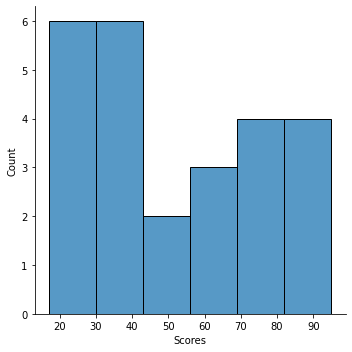

In [10]:
sns.displot(dataset["Scores"])

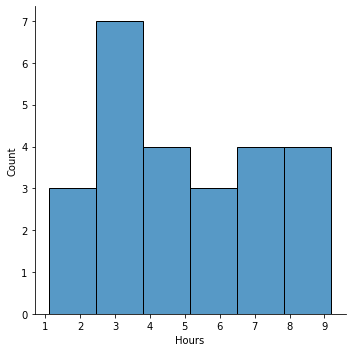

In [11]:
sns.displot(dataset["Hours"])

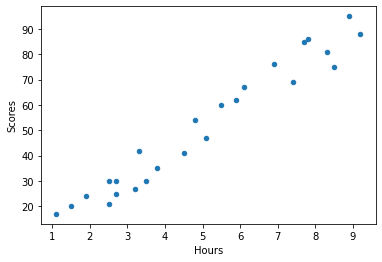

In [14]:
dataset.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [25]:
X=dataset["Hours"]
y=dataset["Scores"]
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)
print("x:",X,"y",y)

x: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] y [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [27]:
X_train

array([[4.8],
       [6.1],
       [2.7],
       [9.2],
       [1.1],
       [5.5],
       [8.3],
       [7.7],
       [8.9],
       [7.8],
       [2.5],
       [6.9],
       [3.3],
       [1.9],
       [8.5],
       [2.7]])

In [28]:
trainmodel=LinearRegression()
trainmodel.fit(X_train,y_train)

LinearRegression()

In [30]:
trainmodel.score(X_train,y_train)

0.9604231695493518

In [31]:
trainmodel.score(X_test,y_test)

0.8385399196928859

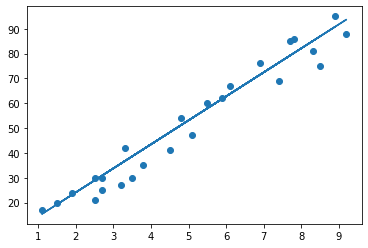

In [33]:
m=trainmodel.coef_
c=trainmodel.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [34]:
y_pred=trainmodel.predict(X_test)
y_pred

array([[76.29311571],
       [35.71287388],
       [61.8001722 ],
       [54.07060233],
       [38.61146258],
       [19.2875379 ],
       [48.27342492],
       [41.51005129],
       [28.94950024]])

In [35]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  5.270480040928884
Mean Squared Error Value is :  38.90988601968972


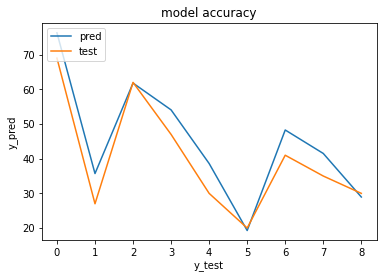

In [36]:
plt.plot(y_pred)
plt.plot(y_test)
plt.title('model accuracy')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.legend(['pred', 'test'], loc='upper left')
plt.show()